Hello Marie.

Regarding the organizatoin of the files for the project, I will be glad to hear your comments.

I propose we create, so far, a ipynb documment to estimate the fall in demand of transportation by counties.

And we will see how things go for the rest.

I would create probably another file called,(ex_code) example code which contains some useful functions that I think could be useful for python.

As for the comments, I guess we can use the following example below

Don't hesitate to propose any comments, also if you think that it is too much of a work, we can may ask for an additional extra help, knowing that more people requires more coordination. 

Anywas, text me once you get to configurate your files and VS Code. 

Best

Also when wanting to leave a special comment to other one I propose we use a @Marie or @Santiago tag at the beggining of the line
@ Marie, ok?

In [1]:
!pip install wheel
!pip install pandas
!pip install plotly
!pip install numpy
!pip install matplotlib
!pip install kaleido
!pip3 install nbformat

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [2]:
###### The purpose of these lines is.....
###### 
### Comment: What's the purpose of the function.
def function (var1, var2):
### What the function does, and why the variables are needed. 
    return()
### what does it return and in which format

In [2]:
### Importing the needed packages
import pandas as pd
import numpy as np
import os
import matplotlib
import nbformat

In [3]:
# Setting the directory: Maybe instead of modifying this line, you can add a new line with your path
# os.chdir("C:/Users/santi/OneDrive/GHG_07_08_2021/Data/movement-range-data-2021-04-27/")
os.chdir("/Users/marie/Desktop/Papier/Data/movement-range-2021-04-27/")

In [24]:
os.chdir("C:/Users/santi/OneDrive/GHG_07_08_2021/Data/movement-range-data-2021-04-27/")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/santi/OneDrive/GHG_07_08_2021/Data/movement-range-data-2021-04-27/'

In [4]:
facebook_data = pd.read_table("movement-range-2021-04-27.txt")

/Users/marie/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Importing Facebook Data
ones = []
# Loop to add a column of ones to the dataset 
for i in range(facebook_data.shape[0]):
    ones.append(1)
# Adding it to the dataset
facebook_data['ones'] = ones
# Getting the count of observations by Country
by_country = facebook_data['ones'].groupby(facebook_data.country).sum()
# Observatoins in the United States
print(by_country[by_country.index == "USA"])
# Creating a smaller database with only USA's observations
facebook_data_USA = facebook_data[facebook_data.country == "USA"]

country
USA    1028263
Name: ones, dtype: int64


In [6]:
#To see how the data set looks like 
facebook_data_USA.head()

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,ones
5397902,2020-03-01,USA,FIPS,01001,Autauga,0.04845,0.18910,full_february_except_presidents_day,DAY_OF_WEEK,1
5397903,2020-03-02,USA,FIPS,01001,Autauga,0.03275,0.15003,full_february_except_presidents_day,DAY_OF_WEEK,1
5397904,2020-03-03,USA,FIPS,01001,Autauga,0.05122,0.14391,full_february_except_presidents_day,DAY_OF_WEEK,1
5397905,2020-03-04,USA,FIPS,01001,Autauga,-0.04741,0.16058,full_february_except_presidents_day,DAY_OF_WEEK,1
5397906,2020-03-05,USA,FIPS,01001,Autauga,0.06285,0.15298,full_february_except_presidents_day,DAY_OF_WEEK,1


In [7]:
# To check whether the poligons correspond with the ones in the Occupations dataset 
# As a comment because the list is very long
# counties=set(facebook_data_USA.polygon_name) 
# counties

In [8]:
# Getting the count of observations by county
by_county = facebook_data['ones'].groupby(facebook_data.polygon_name).sum()
# Observatoins in Los Angeles
print(by_county[by_county.index == "Los Angeles"])

polygon_name
Los Angeles    423
Name: ones, dtype: int64


In [9]:
facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]
#Each observation corresponds to one day 

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,ones
5466168,2020-03-01,USA,FIPS,6037,Los Angeles,-0.01012,0.15700,full_february_except_presidents_day,DAY_OF_WEEK,1
5466169,2020-03-02,USA,FIPS,6037,Los Angeles,0.00395,0.11065,full_february_except_presidents_day,DAY_OF_WEEK,1
5466170,2020-03-03,USA,FIPS,6037,Los Angeles,0.02396,0.10284,full_february_except_presidents_day,DAY_OF_WEEK,1
5466171,2020-03-04,USA,FIPS,6037,Los Angeles,-0.00217,0.10628,full_february_except_presidents_day,DAY_OF_WEEK,1
5466172,2020-03-05,USA,FIPS,6037,Los Angeles,-0.00293,0.10797,full_february_except_presidents_day,DAY_OF_WEEK,1
...,...,...,...,...,...,...,...,...,...,...
5466586,2021-04-23,USA,FIPS,6037,Los Angeles,-0.15211,0.16415,full_february_except_presidents_day,DAY_OF_WEEK,1
5466587,2021-04-24,USA,FIPS,6037,Los Angeles,-0.09710,0.17853,full_february_except_presidents_day,DAY_OF_WEEK,1
5466588,2021-04-25,USA,FIPS,6037,Los Angeles,-0.08621,0.20428,full_february_except_presidents_day,DAY_OF_WEEK,1
5466589,2021-04-26,USA,FIPS,6037,Los Angeles,-0.14627,0.17540,full_february_except_presidents_day,DAY_OF_WEEK,1


/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


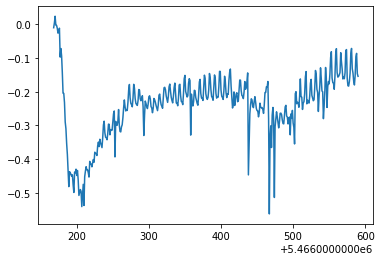

In [10]:
# Checking the behavior of a random county in California
facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]["all_day_bing_tiles_visited_relative_change"].plot()
facebook_data_USA["date"] = pd.to_datetime(facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]['ds'])

# @Santiago, 

In [11]:
facebook_data_USA["date"]

5397902   NaT
5397903   NaT
5397904   NaT
5397905   NaT
5397906   NaT
           ..
6426160   NaT
6426161   NaT
6426162   NaT
6426163   NaT
6426164   NaT
Name: date, Length: 1028263, dtype: datetime64[ns]

In [12]:
### Ploting the graph with the dates 
### Improved plots
import plotly.express as px 
import plotly.graph_objs as go

fig = go.Figure(data=go.Scatter(x= facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]['ds'].astype(dtype=str), 
                        y= facebook_data_USA[facebook_data_USA.polygon_name == "Buffalo"]["all_day_bing_tiles_visited_relative_change"],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Relative Change on Movement',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":""},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

fig = go.Figure(data=go.Scatter(x= facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]['ds'].astype(dtype=str), 
                        y= facebook_data_USA[facebook_data_USA.polygon_name == "Buffalo"]["all_day_ratio_single_tile_users"],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Staying in Put',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":""},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

<AxesSubplot:>

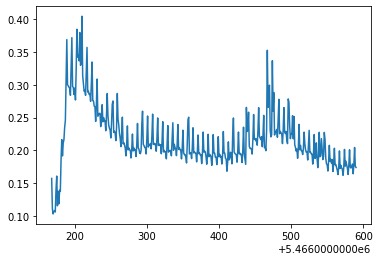

In [13]:
# Graph that shows the other indicator but for the Saty in Put index
facebook_data_USA[facebook_data_USA.polygon_name == "Los Angeles"]["all_day_ratio_single_tile_users"].plot()
# @Marie what do you think can explain the difference between these two indicatos in the second wave?
# Actually they both reflect similar results in the sense that at the onset of the pandemy there is a peak of people who
# stay at home, and then it goes down as distanctiation measures became softer. However, it is intersting to see that it remains on
# average above 10%, which is the precovid Level

<AxesSubplot:>

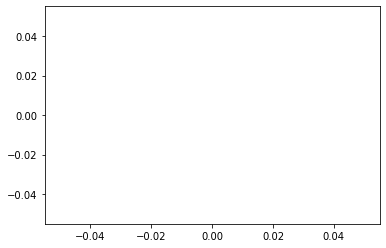

In [14]:
# It seems like there are several countyes that do not appear, and some others
# that are repeated
facebook_data_USA[facebook_data_USA.polygon_name == "Nuckolls"]["all_day_ratio_single_tile_users"].plot()
# @Marie, we need to compe up with a code to check which counties are on the dataset
# maybe we can start by doing a by state analysis

<AxesSubplot:>

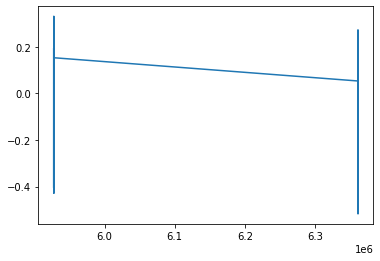

In [15]:
# checking the behavior of a random county in Nebraska
facebook_data_USA[facebook_data_USA.polygon_name == "Buffalo"]["all_day_bing_tiles_visited_relative_change"].plot()
# There is more than a county with the same name

In [16]:
#Usually the first two numbers are the state, I propose that we code for a given State and then we can iterate over",

State_code = []
for state in facebook_data_USA["polygon_id"]:
# getting the code faster
    if str(state)[:2] in State_code:
        pass
    else:
        State_code.append(str(state)[:2])
# I got 57 states to iterate over afterwards
    len(State_code)
# This code is to be used afterards, just a comment: better to use if conditions to save time and computer performance instead of
# looping over all the observations

In [ ]:
# Need to figure out how to get the values that coorrespond to a given state
facebook_data_USA['polygon_id'] = facebook_data_USA['polygon_id'].astype(str)
# It would be better to treat those values as strings, so that it will be easier to handle them
facebook_data_USA[facebook_data_USA.polygon_id == '01?' ].head(2)

In [17]:
facebook_data_USA['polygon_id'].head(2)

5397902    01001
5397903    01001
Name: polygon_id, dtype: object

In [18]:
# Maybe we need to check what happens at different time scales",
# # It will be usefull to graph the tie series"